In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('raw_depression_dataset.csv')
df.head(10)


/tmp/ipykernel_442/703123055.py:1: DtypeWarning: Columns (7,8,9,10,11,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('raw_depression_dataset.csv')


,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,3,Yuvraj,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,4,Rhea,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0
5,5,Vani,Female,59.0,Ahmedabad,Working Professional,Finanancial Analyst,NaN,2.0,NaN,NaN,5.0,5-6 hours,Healthy,MCA,No,7.0,5.0,No,0
6,6,Ritvik,Male,47.0,Thane,Working Professional,Chemist,NaN,5.0,NaN,NaN,2.0,7-8 hours,Moderate,MD,No,6.0,2.0,No,0
7,7,Rajveer,Male,38.0,Nashik,Working Professional,Teacher,NaN,3.0,NaN,NaN,4.0,7-8 hours,Unhealthy,B.Pharm,No,10.0,3.0,Yes,0
8,8,Aishwarya,Female,24.0,Bangalore,Student,NaN,2.0,NaN,5.9,5.0,NaN,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
9,9,Simran,Female,42.0,Patna,Working Professional,Electrician,NaN,4.0,NaN,NaN,1.0,5-6 hours,Healthy,ME,Yes,7.0,2.0,Yes,0


In [3]:
df['Working Professional or Student'].value_counts()

Working Professional or Student
Working Professional    136776
Student                  33924
Name: count, dtype: int64

Baseline: Xử lý data 1 cách cơ bản, làm sạch 1 số cột số chứa mixed data, và fill missing  = 0

In [4]:
# 1. Drop irrelevant columns
df_clean = df.drop(columns=['Name'])

# 2. Clean Numeric Columns with Mixed Data
numeric_cols = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Financial Stress']
for col in numeric_cols:
    # coerce errors turns 'Error', '??', 'High' etc into NaN
    df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')

# 3. Drop Duplicates (always good for preliminary cleaning)
df_clean = df_clean.drop_duplicates()


In [5]:
df_student = df_clean[df_clean["Working Professional or Student"] == "Student"]
df_working_professional = df_clean[df_clean["Working Professional or Student"] == "Working Professional"]

In [6]:
df_student = df_student.select_dtypes(include=['number']).fillna(0)
df_working_professional = df_working_professional.select_dtypes(include=['number']).fillna(0)

In [7]:
X_student = df_student.drop("Depression", axis=1)
y_student = df_student["Depression"]

X_worker = df_working_professional.drop("Depression", axis=1)
y_worker = df_working_professional["Depression"]


In [8]:
RANDOM_STATE = 42
X_train_student, X_test_student, y_train_student, y_test_student = train_test_split(X_student, y_student, stratify=y_student, random_state=RANDOM_STATE)
X_train_worker, X_test_worker, y_train_worker, y_test_worker = train_test_split(X_worker, y_worker, stratify=y_worker, random_state=RANDOM_STATE)

In [9]:
student_model = RandomForestClassifier()
working_professional_model = RandomForestClassifier()

In [10]:
student_model.fit(X_train_student, y_train_student)

RandomForestClassifier()

In [11]:
working_professional_model.fit(X_train_worker, y_train_worker)

RandomForestClassifier()

In [12]:
y_pred_student = student_model.predict(X_test_student)
y_pred_worker = working_professional_model.predict(X_test_worker)

Classification Report for Student MODEL
              precision    recall  f1-score   support

           0       0.77      0.73      0.75      3518
           1       0.82      0.84      0.83      4963

    accuracy                           0.80      8481
   macro avg       0.79      0.79      0.79      8481
weighted avg       0.80      0.80      0.80      8481



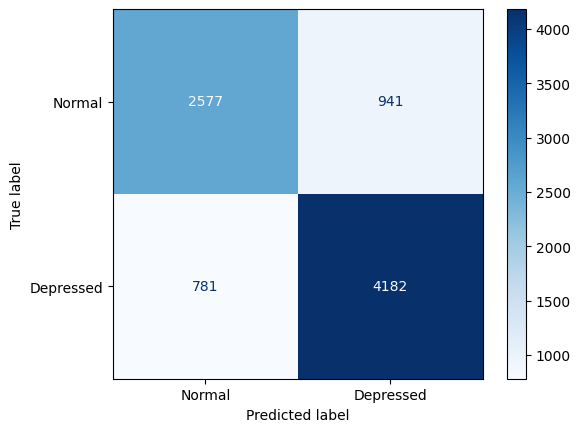

In [13]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Classification Report for Student MODEL")
print(classification_report(y_test_student, y_pred_student))

# Vẽ ma trận
ConfusionMatrixDisplay.from_predictions(y_test_student, y_pred_student, display_labels=["Normal", "Depressed"], cmap="Blues")
plt.show()


Classification Report for Worker MODEL
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     31386
           1       0.74      0.59      0.65      2808

    accuracy                           0.95     34194
   macro avg       0.85      0.78      0.81     34194
weighted avg       0.95      0.95      0.95     34194



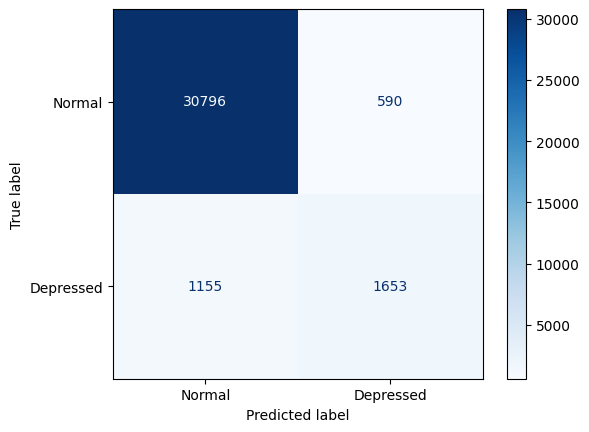

In [14]:
print("Classification Report for Worker MODEL")
print(classification_report(y_test_worker, y_pred_worker))

# Vẽ ma trận
ConfusionMatrixDisplay.from_predictions(y_test_worker, y_pred_worker, display_labels=["Normal", "Depressed"], cmap="Blues")
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f6527928-bbf4-4c9a-8760-1f30ce0e5ba3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>